In [7]:
import re
import os
import joblib
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import arabic_reshaper
from matplotlib import rcParams
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset
from bidi.algorithm import get_display


In [3]:
path = kagglehub.dataset_download("youssefhergal/dataset-arabic-generated-text")
print("Path to dataset files:", path)

dataset_path = os.path.join(path, "")
print("Dataset path:", dataset_path)

dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Path to dataset files: C:\Users\ammar\.cache\kagglehub\datasets\youssefhergal\dataset-arabic-generated-text\versions\1
Dataset path: C:\Users\ammar\.cache\kagglehub\datasets\youssefhergal\dataset-arabic-generated-text\versions\1\
Dataset files: ['dev_set.csv', 'sample_submission.csv', 'test_set.csv', 'train_set.csv']


In [4]:
dev_set_df = pd.read_csv(os.path.join(dataset_path, "dev_set.csv"))
train_set_df = pd.read_csv(os.path.join(dataset_path, "train_set.csv"))

In [5]:
dev_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_id    1450 non-null   int64 
 1   text       1450 non-null   object
 2   generated  1450 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.1+ KB


In [6]:
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_id    6763 non-null   int64 
 1   text       6763 non-null   object
 2   generated  6763 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 158.6+ KB


In [7]:
dev_set_df.head()

,text_id,text,generated
0,2650,في لحظةٍ غامضة، عندما انحنت الشمس نحو الأفق، و...,1
1,8091,وارسطو ؛' تكوين الطباع والكمال الحلقي للانسان ...,0
2,3709,في قلب المدينة القديمة، حيث تختلط الروائح العت...,1
3,10437,غالية البقمية حصنا منيعا أمام هذا السقوط المدو...,0
4,3577,"في ""الجبال الشمالية""، حيث كانت الرياح تعصف بال...",1


In [8]:
import pandas as pd

# Assuming you have your DataFrame 'dev_set_df' loaded

pd.set_option('display.max_rows', None)    # To display all rows (if needed)
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option('display.width', None)      # To prevent horizontal scrolling
pd.set_option('display.max_colwidth', None) # To display full column content

print(dev_set_df.head())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

   text_id  \
0     2650   
1     8091   
2     3709   
3    10437   
4     3577   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [9]:
train_set_df.head()

,text_id,text,generated
0,9519,380 أرض السوار\nوكيف ظل البحارة يرفعون الأحمال...,0
1,6247,- وقال كَيةِ لحسان'» : قل فوالله لقولك أشدّ عل...,0
2,3065,في غابة نائية عميقة، حيث تسكن الأشجار الضخمة و...,1
3,652,"في صميم قرية ""العُتمة""، حيث تتجذر أشجار الزيتو...",1
4,3447,\nفي قلب مدينة مزدحمة لم تنم يومًا، حيث تتشابك...,1


In [10]:
df = pd.concat([dev_set_df, train_set_df], ignore_index=True)
df.head()

,text_id,text,generated
0,2650,في لحظةٍ غامضة، عندما انحنت الشمس نحو الأفق، و...,1
1,8091,وارسطو ؛' تكوين الطباع والكمال الحلقي للانسان ...,0
2,3709,في قلب المدينة القديمة، حيث تختلط الروائح العت...,1
3,10437,غالية البقمية حصنا منيعا أمام هذا السقوط المدو...,0
4,3577,"في ""الجبال الشمالية""، حيث كانت الرياح تعصف بال...",1


In [11]:
df = df.drop(columns=["text_id"])
df = df.rename(columns={"generated": "source"})

In [12]:
df.head()

,text,source
0,في لحظةٍ غامضة، عندما انحنت الشمس نحو الأفق، و...,1
1,وارسطو ؛' تكوين الطباع والكمال الحلقي للانسان ...,0
2,في قلب المدينة القديمة، حيث تختلط الروائح العت...,1
3,غالية البقمية حصنا منيعا أمام هذا السقوط المدو...,0
4,"في ""الجبال الشمالية""، حيث كانت الرياح تعصف بال...",1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8213 entries, 0 to 8212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8213 non-null   object
 1   source  8213 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.5+ KB


In [14]:
df.duplicated().sum()

429

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(7784, 2)

<Axes: xlabel='source', ylabel='count'>

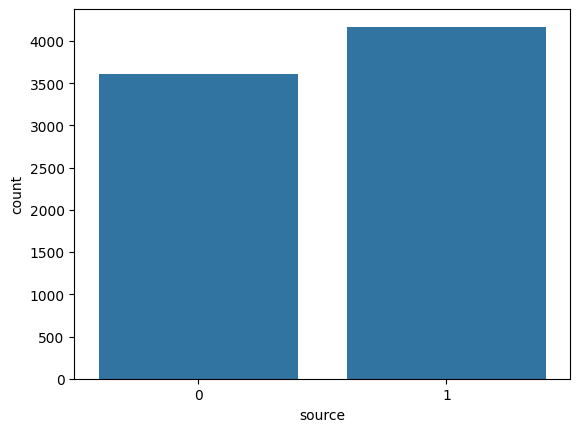

In [17]:
sns.countplot(data=df,x='source')

In [18]:
df['text'][0]

'في لحظةٍ غامضة، عندما انحنت الشمس نحو الأفق، وأخذت أحضان الليل تكتنف المدينة بألوانها الداكنة، كان يوسف يتجول في أزقة الحي القديم. تحيط به روائح الأعشاب والتوابل المتناثرة من المتاجر الصغيرة التي تصطف على جانبي الطرقات. كان صدى خطواته يتردد كهمسات ماضيه، وكأن الجدران المتهالكة تحمل أسرار أجيالٍ مضت. \n\nفجأة، لمح من بعيد مقهى صغيرًا، كان يلمع كما لو كان نجمةً متوهجةً في سماءٍ خانقة. تجمعت حوله كراسيٌ خشبيةٌ ذات طابعٍ تقليدي، ومرت بسرعة طاولة تعج بالنقاشات المتأججة. انتزعته أضواء الشموع المرفرفة، وأطلق خياله للسباحة في بحار الشوق والأمل. \n\nدخل المقهى بخطواتٍ مترددة، وكأن يدخل إلى عالمٍ آخر حيث الزمن يتوقف، وحيث تُنسج القصص ببراعة. استقبلته نغمات العود المعزوفة بإتقان، بينما تعالت ضحكات الأصدقاء الجالسين. تذكر تلك الليالي التي كانت تُفجر فيها الكلمات أحلامًا لم تتحقق، حيث كانت تسرق الآمال من شغاف القلوب وتوزعها على الأقدار.\n\nكان يجلس في ركنٍ بعيد، يتأمل الوجوه ويتفحص العيون التي تحمل قصصًا لا تُفصح عنها. كل نظرة كانت كعاصفةٍ من المشاعر: الفرح، الحزن، الغيرة، والشغف. بدا له أن كل شخص

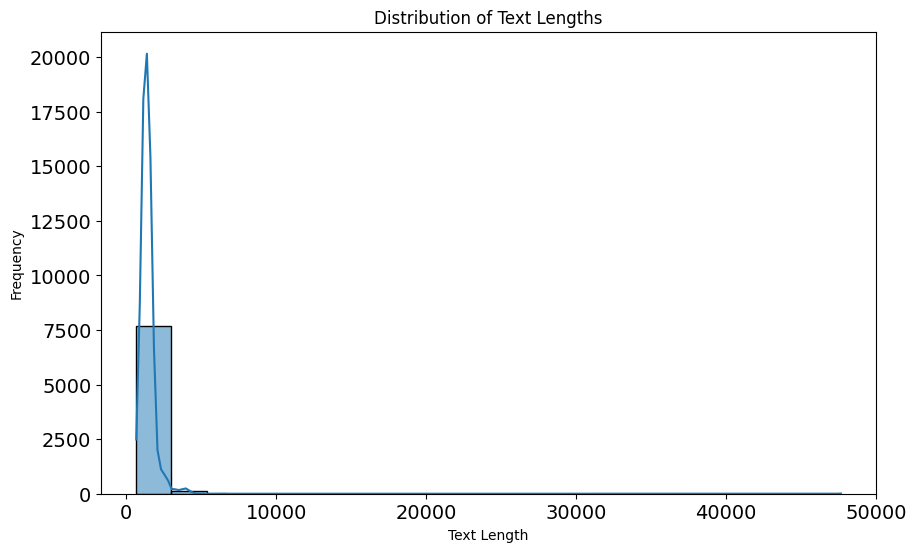

In [19]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [20]:
df['text_length'].describe()

count     7784.000000
mean      1428.513618
std        699.920495
min        665.000000
25%       1157.000000
50%       1353.000000
75%       1599.000000
max      47667.000000
Name: text_length, dtype: float64

In [21]:
df = df.drop(columns=['text_length'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7784 entries, 0 to 8212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7784 non-null   object
 1   source  7784 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 440.5+ KB


In [23]:
def clean_text(text):
    cleaning_pattern = r'[^\u0621-\u064A\s]'

    clean_text = re.sub(cleaning_pattern, '', text)

    clean_text = clean_text.replace('\n', ' ')

    clean_text = re.sub(r'\s+', ' ', clean_text)

    return clean_text.strip()

In [24]:
df['text'] = df['text'].apply(clean_text)

In [25]:
df['text'][0]

'في لحظة غامضة عندما انحنت الشمس نحو الأفق وأخذت أحضان الليل تكتنف المدينة بألوانها الداكنة كان يوسف يتجول في أزقة الحي القديم تحيط به روائح الأعشاب والتوابل المتناثرة من المتاجر الصغيرة التي تصطف على جانبي الطرقات كان صدى خطواته يتردد كهمسات ماضيه وكأن الجدران المتهالكة تحمل أسرار أجيال مضت فجأة لمح من بعيد مقهى صغيرا كان يلمع كما لو كان نجمة متوهجة في سماء خانقة تجمعت حوله كراسي خشبية ذات طابع تقليدي ومرت بسرعة طاولة تعج بالنقاشات المتأججة انتزعته أضواء الشموع المرفرفة وأطلق خياله للسباحة في بحار الشوق والأمل دخل المقهى بخطوات مترددة وكأن يدخل إلى عالم آخر حيث الزمن يتوقف وحيث تنسج القصص ببراعة استقبلته نغمات العود المعزوفة بإتقان بينما تعالت ضحكات الأصدقاء الجالسين تذكر تلك الليالي التي كانت تفجر فيها الكلمات أحلاما لم تتحقق حيث كانت تسرق الآمال من شغاف القلوب وتوزعها على الأقدار كان يجلس في ركن بعيد يتأمل الوجوه ويتفحص العيون التي تحمل قصصا لا تفصح عنها كل نظرة كانت كعاصفة من المشاعر الفرح الحزن الغيرة والشغف بدا له أن كل شخص في المقهى كان يعيش حكايته الخاصة محلقا في عالم من الخيال

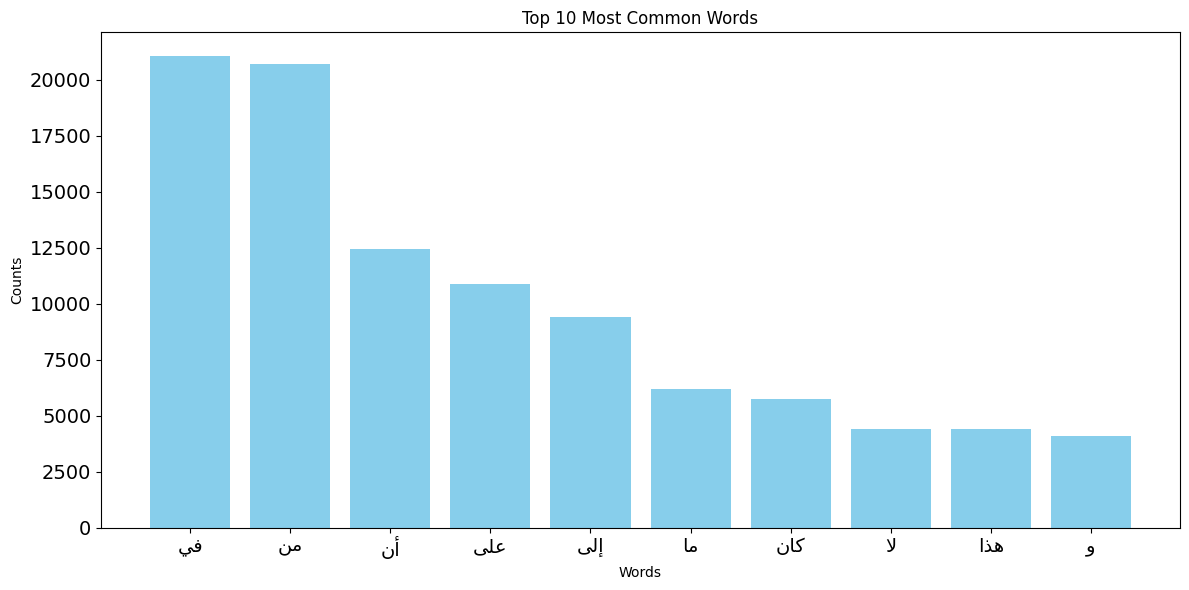

In [26]:
top_words = Counter(" ".join(df[df['source'] == 0]['text']).split()).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

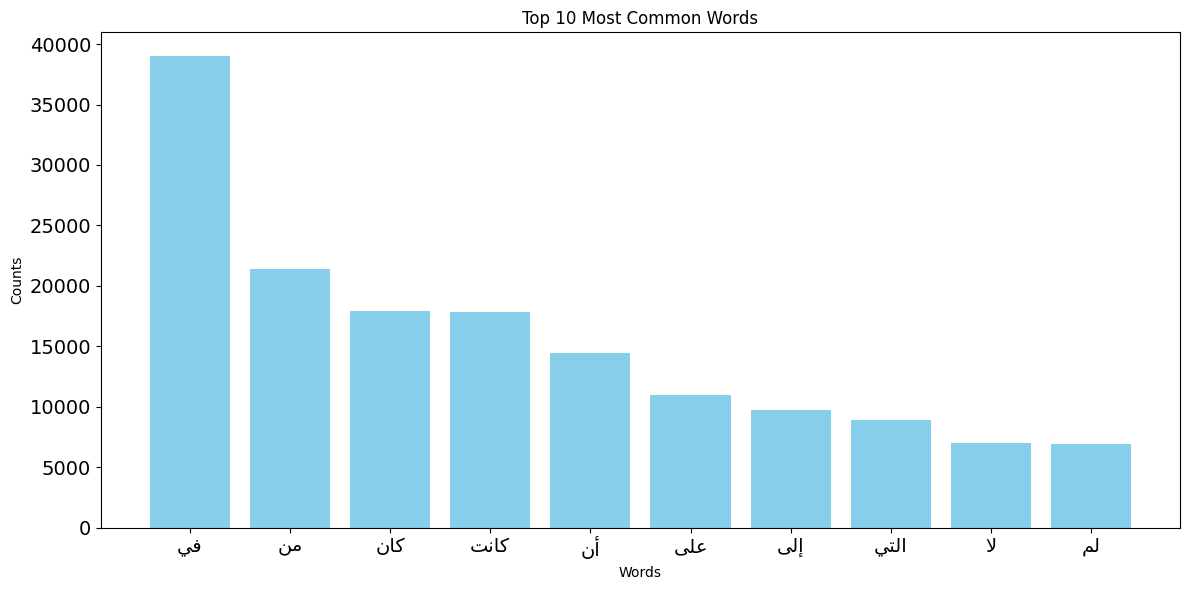

In [27]:
top_words = Counter(" ".join(df[df['source'] == 1]['text']).split()).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [28]:
import nltk
from nltk.tokenize import RegexpTokenizer

arabic_tokenizer = RegexpTokenizer(r'[\u0600-\u06FF]+')

df['tokenized_text'] = df['text'].apply(lambda x: arabic_tokenizer.tokenize(x))


In [29]:
df.head()

,text,source,tokenized_text
0,في لحظة غامضة عندما انحنت الشمس نحو الأفق وأخذ...,1,"[في, لحظة, غامضة, عندما, انحنت, الشمس, نحو, ال..."
1,وارسطو تكوين الطباع والكمال الحلقي للانسان قبل...,0,"[وارسطو, تكوين, الطباع, والكمال, الحلقي, للانس..."
2,في قلب المدينة القديمة حيث تختلط الروائح العتي...,1,"[في, قلب, المدينة, القديمة, حيث, تختلط, الروائ..."
3,غالية البقمية حصنا منيعا أمام هذا السقوط المدو...,0,"[غالية, البقمية, حصنا, منيعا, أمام, هذا, السقو..."
4,في الجبال الشمالية حيث كانت الرياح تعصف بالأشج...,1,"[في, الجبال, الشمالية, حيث, كانت, الرياح, تعصف..."


In [30]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('arabic'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_stopwords(x))

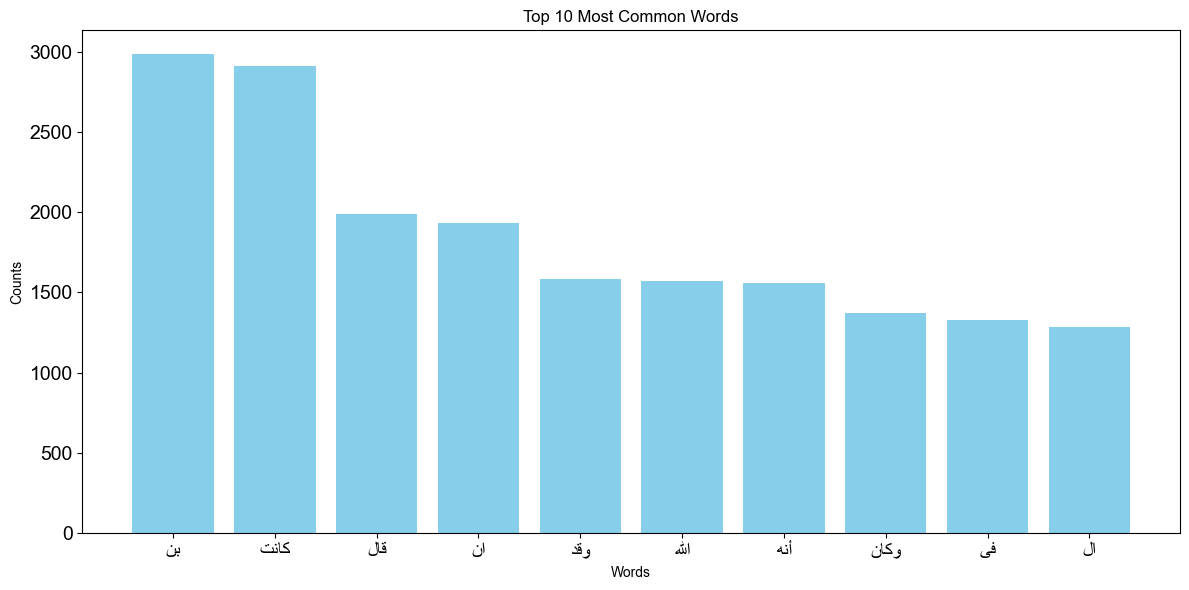

In [32]:
rcParams['font.family'] = 'Arial'

all_tokens = [token for tokens_list in df[df['source'] == 0]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

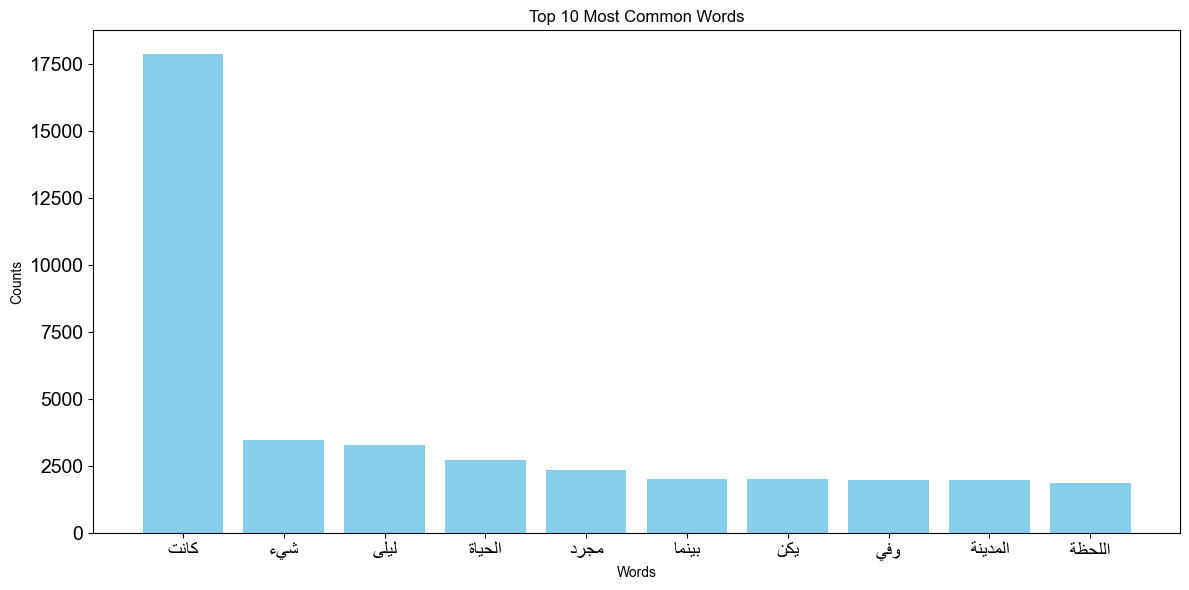

In [33]:
rcParams['font.family'] = 'Arial'

all_tokens = [token for tokens_list in df[df['source'] == 1]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
df['tokenized_text'][0]

['لحظة',
 'غامضة',
 'عندما',
 'انحنت',
 'الشمس',
 'الأفق',
 'وأخذت',
 'أحضان',
 'الليل',
 'تكتنف',
 'المدينة',
 'بألوانها',
 'الداكنة',
 'يوسف',
 'يتجول',
 'أزقة',
 'الحي',
 'القديم',
 'تحيط',
 'روائح',
 'الأعشاب',
 'والتوابل',
 'المتناثرة',
 'المتاجر',
 'الصغيرة',
 'تصطف',
 'جانبي',
 'الطرقات',
 'صدى',
 'خطواته',
 'يتردد',
 'كهمسات',
 'ماضيه',
 'وكأن',
 'الجدران',
 'المتهالكة',
 'تحمل',
 'أسرار',
 'أجيال',
 'مضت',
 'فجأة',
 'لمح',
 'بعيد',
 'مقهى',
 'صغيرا',
 'يلمع',
 'نجمة',
 'متوهجة',
 'سماء',
 'خانقة',
 'تجمعت',
 'حوله',
 'كراسي',
 'خشبية',
 'طابع',
 'تقليدي',
 'ومرت',
 'بسرعة',
 'طاولة',
 'تعج',
 'بالنقاشات',
 'المتأججة',
 'انتزعته',
 'أضواء',
 'الشموع',
 'المرفرفة',
 'وأطلق',
 'خياله',
 'للسباحة',
 'بحار',
 'الشوق',
 'والأمل',
 'دخل',
 'المقهى',
 'بخطوات',
 'مترددة',
 'وكأن',
 'يدخل',
 'عالم',
 'آخر',
 'الزمن',
 'يتوقف',
 'وحيث',
 'تنسج',
 'القصص',
 'ببراعة',
 'استقبلته',
 'نغمات',
 'العود',
 'المعزوفة',
 'بإتقان',
 'بينما',
 'تعالت',
 'ضحكات',
 'الأصدقاء',
 'الجالسين',
 'تذكر',


In [35]:
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

In [36]:
df['stemmed_text'] = df['tokenized_text'].apply(stem_tokens)

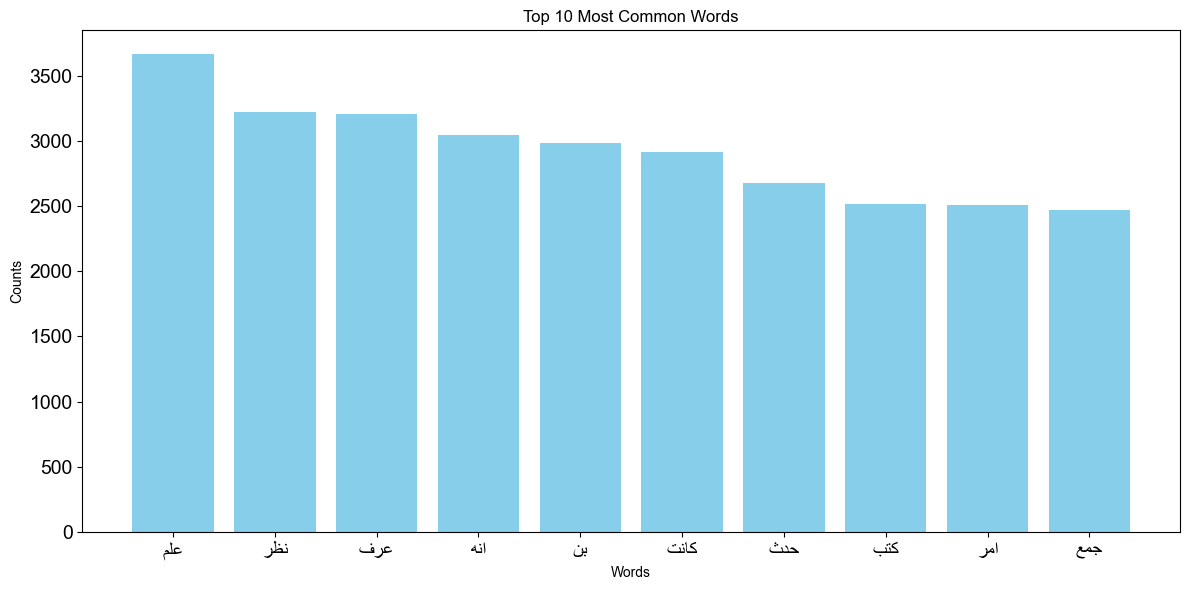

In [37]:
rcParams['font.family'] = 'Arial'

all_tokens = [token for tokens_list in df[df['source'] == 0]['stemmed_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

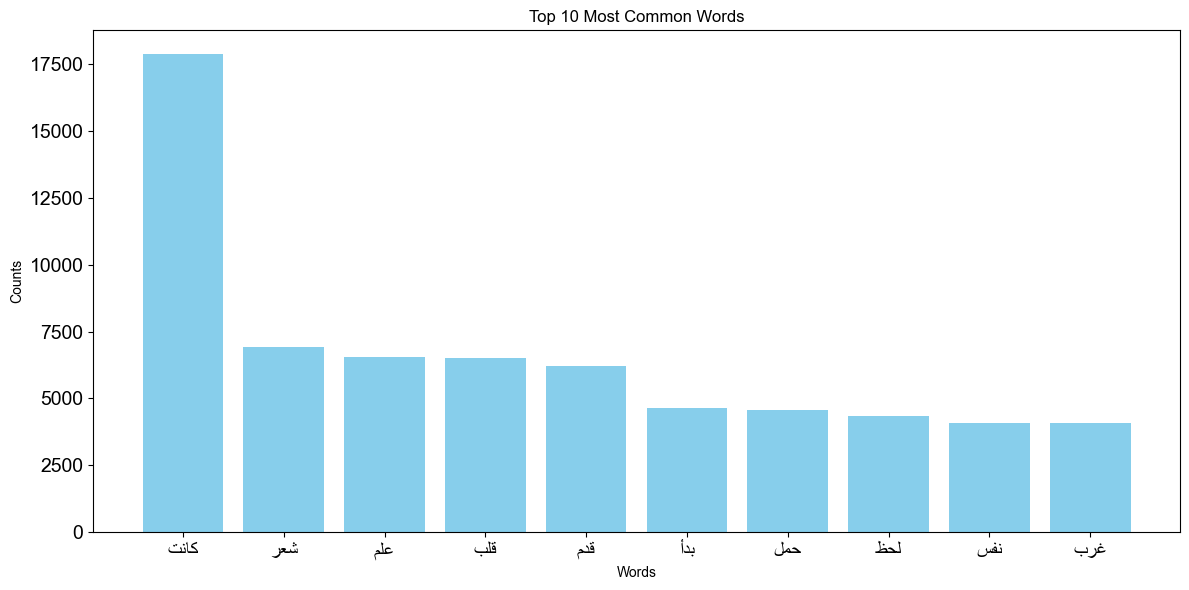

In [38]:
rcParams['font.family'] = 'Arial'

all_tokens = [token for tokens_list in df[df['source'] == 1]['stemmed_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*[
    (get_display(arabic_reshaper.reshape(word)), count) 
    for word, count in top_words
])

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
df.to_pickle('arabic.pkl')
#This was done once before. Do not run this cell just read the pkl file.

In [1]:
import pandas as pd
df = pd.read_pickle('pickles\\arabic.pkl')
# read the preprocessed data file.

In [41]:
df.head()

,text,source,tokenized_text,stemmed_text
0,في لحظة غامضة عندما انحنت الشمس نحو الأفق وأخذ...,1,"[لحظة, غامضة, عندما, انحنت, الشمس, الأفق, وأخذ...","[لحظ, غمض, عند, حنت, شمس, افق, أخذ, احض, ليل, ..."
1,وارسطو تكوين الطباع والكمال الحلقي للانسان قبل...,0,"[وارسطو, تكوين, الطباع, والكمال, الحلقي, للانس...","[رسطو, تكو, طبع, كمل, حلق, انس, تسع, علم, نمو,..."
2,في قلب المدينة القديمة حيث تختلط الروائح العتي...,1,"[قلب, المدينة, القديمة, تختلط, الروائح, العتيق...","[قلب, دين, قدم, خلط, رئح, عتق, حدث, معا, كرم, ..."
3,غالية البقمية حصنا منيعا أمام هذا السقوط المدو...,0,"[غالية, البقمية, حصنا, منيعا, السقوط, المدوي, ...","[غلي, بقم, حصن, يعا, سقط, دوي, ظلت, صدؤ, ردد, ..."
4,في الجبال الشمالية حيث كانت الرياح تعصف بالأشج...,1,"[الجبال, الشمالية, كانت, الرياح, تعصف, بالأشجا...","[جبل, شمل, كانت, ريح, عصف, شجر, يتة, ثلج, تغط,..."


In [42]:
df['stemmed_text'][0]

['لحظ',
 'غمض',
 'عند',
 'حنت',
 'شمس',
 'افق',
 'أخذ',
 'احض',
 'ليل',
 'كنف',
 'دين',
 'ألو',
 'دكن',
 'وسف',
 'تجل',
 'ازق',
 'الح',
 'قدم',
 'تحط',
 'رئح',
 'عشب',
 'وبل',
 'ناثر',
 'تجر',
 'صغر',
 'صطف',
 'جنب',
 'طرق',
 'صدى',
 'خطا',
 'ردد',
 'كهمس',
 'اضه',
 'وكأ',
 'جدر',
 'تهل',
 'حمل',
 'سرر',
 'جيل',
 'مضت',
 'فجأ',
 'لمح',
 'بعد',
 'قهى',
 'صغر',
 'لمع',
 'نجم',
 'توهج',
 'سمء',
 'خنق',
 'جمع',
 'حول',
 'كرس',
 'خشب',
 'طبع',
 'قلد',
 'ومر',
 'سرع',
 'طال',
 'تعج',
 'نقش',
 'تأجج',
 'نزع',
 'ضوء',
 'شمع',
 'رفرف',
 'أطلق',
 'خيل',
 'سبح',
 'بحر',
 'شوق',
 'امل',
 'دخل',
 'قهى',
 'خطو',
 'تردد',
 'وكأ',
 'دخل',
 'علم',
 'اخر',
 'زمن',
 'وقف',
 'وحث',
 'نسج',
 'قصص',
 'برع',
 'استقبلته',
 'نغم',
 'عود',
 'عزف',
 'إتق',
 'بين',
 'علت',
 'ضحك',
 'صدقاء',
 'جلس',
 'ذكر',
 'ليل',
 'كانت',
 'فجر',
 'كلم',
 'احل',
 'حقق',
 'كانت',
 'سرق',
 'امل',
 'شغف',
 'قلب',
 'وزع',
 'قدر',
 'جلس',
 'ركن',
 'بعد',
 'أمل',
 'وجه',
 'فحص',
 'عين',
 'حمل',
 'قصص',
 'فصح',
 'عنه',
 'نظر',
 'كانت',

In [43]:
X = df['stemmed_text']
y = df['source']

In [44]:
df['source'].value_counts()

source
1    4170
0    3614
Name: count, dtype: int64

In [45]:
X = [' '.join(doc) for doc in X]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
print(len(X_train))
print(len(y_train))

5448
5448


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
pipelines = {
    'Naive Bayes': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ]),

    'Logistic Regression': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),

    'Passive Aggressive': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', PassiveAggressiveClassifier(max_iter=1000))
    ]),
    
    'Random Forest': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ]),

    'XGBoost': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
}

In [50]:
nb_pipeline = pipelines['Naive Bayes']

nb_pipeline.fit(X_train, y_train)

nb_pred = nb_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report 
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9576198630136986
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1087
           1       0.93      1.00      0.96      1249

    accuracy                           0.96      2336
   macro avg       0.96      0.95      0.96      2336
weighted avg       0.96      0.96      0.96      2336



In [51]:
logreg_pipeline = pipelines['Logistic Regression']  
logreg_pipeline.fit(X_train, y_train)

logreg_pred = logreg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.9910102739726028
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1087
           1       1.00      0.99      0.99      1249

    accuracy                           0.99      2336
   macro avg       0.99      0.99      0.99      2336
weighted avg       0.99      0.99      0.99      2336



In [52]:
pa_pipeline = pipelines['Passive Aggressive']
pa_pipeline.fit(X_train, y_train)

pa_pred = pa_pipeline.predict(X_test)

print("Passive Aggressive Accuracy:", accuracy_score(y_test, pa_pred))
print(classification_report(y_test, pa_pred))

Passive Aggressive Accuracy: 0.995291095890411
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1087
           1       1.00      0.99      1.00      1249

    accuracy                           1.00      2336
   macro avg       1.00      1.00      1.00      2336
weighted avg       1.00      1.00      1.00      2336



In [53]:
rf_pipeline = pipelines['Random Forest']
rf_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9738869863013698
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1087
           1       0.97      0.98      0.98      1249

    accuracy                           0.97      2336
   macro avg       0.97      0.97      0.97      2336
weighted avg       0.97      0.97      0.97      2336



In [55]:
xgb_pipeline = pipelines['XGBoost']
xgb_pipeline.fit(X_train, y_train)

XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='logloss')

xgb_pred = xgb_pipeline.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\xgboost\core.py:158: UserWarning: [18:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9845890410958904
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1087
           1       0.99      0.98      0.99      1249

    accuracy                           0.98      2336
   macro avg       0.98      0.98      0.98      2336
weighted avg       0.98      0.98      0.98      2336



In [56]:
import os
import joblib
file_path = r"Models\Arabic" 

pipeline_filename = 'ARABIC_passive_aggressive_pipeline.pkl'

full_output_path = os.path.join(file_path, pipeline_filename)

joblib.dump(pa_pipeline, full_output_path)

print(f"Pipeline saved to: {full_output_path}")

Pipeline saved to: Models\Arabic\ARABIC_passive_aggressive_pipeline.pkl


The following section is designated for deep learning models.

In [9]:
import pandas as pd
df = pd.read_pickle('pickles\\arabic.pkl')
# read the preprocessed data file.

In [2]:
print(type(df['stemmed_text'][0]))
print(df['stemmed_text'][0])

<class 'list'>
['لحظ', 'غمض', 'عند', 'حنت', 'شمس', 'افق', 'أخذ', 'احض', 'ليل', 'كنف', 'دين', 'ألو', 'دكن', 'وسف', 'تجل', 'ازق', 'الح', 'قدم', 'تحط', 'رئح', 'عشب', 'وبل', 'ناثر', 'تجر', 'صغر', 'صطف', 'جنب', 'طرق', 'صدى', 'خطا', 'ردد', 'كهمس', 'اضه', 'وكأ', 'جدر', 'تهل', 'حمل', 'سرر', 'جيل', 'مضت', 'فجأ', 'لمح', 'بعد', 'قهى', 'صغر', 'لمع', 'نجم', 'توهج', 'سمء', 'خنق', 'جمع', 'حول', 'كرس', 'خشب', 'طبع', 'قلد', 'ومر', 'سرع', 'طال', 'تعج', 'نقش', 'تأجج', 'نزع', 'ضوء', 'شمع', 'رفرف', 'أطلق', 'خيل', 'سبح', 'بحر', 'شوق', 'امل', 'دخل', 'قهى', 'خطو', 'تردد', 'وكأ', 'دخل', 'علم', 'اخر', 'زمن', 'وقف', 'وحث', 'نسج', 'قصص', 'برع', 'استقبلته', 'نغم', 'عود', 'عزف', 'إتق', 'بين', 'علت', 'ضحك', 'صدقاء', 'جلس', 'ذكر', 'ليل', 'كانت', 'فجر', 'كلم', 'احل', 'حقق', 'كانت', 'سرق', 'امل', 'شغف', 'قلب', 'وزع', 'قدر', 'جلس', 'ركن', 'بعد', 'أمل', 'وجه', 'فحص', 'عين', 'حمل', 'قصص', 'فصح', 'عنه', 'نظر', 'كانت', 'كعصف', 'شعر', 'فرح', 'حزن', 'غير', 'شغف', 'بدا', 'شخص', 'قهى', 'يعش', 'حكي', 'خصة', 'حلق', 'علم', 'خيل', 

In [10]:
from sklearn.model_selection import train_test_split
import torch
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
MAX_VOCAB_SIZE = 10000
OOV_TOKEN = "<OOV>"

df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))

# 2. Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['final_text'])

sequences = tokenizer.texts_to_sequences(df['final_text'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

y = df['source'].values


# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

# Vocabulary size for embedding layer
vocab_size = min(MAX_VOCAB_SIZE, len(tokenizer.word_index) + 1)
print(f"Vocabulary size for embedding: {vocab_size}")


Vocabulary size for embedding: 10000


In [61]:
print(len(tokenizer.word_index) + 1)

29500


In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import RobertaModel, ElectraModel

# Global hyperparameters (adjust as needed)
vocab_size = 29500  # if you're using a tokenizer like in Keras
embed_dim = 100    
hidden_dim=64                        

class DNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(DNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.global_avg_pool = lambda x: torch.mean(x, dim=1)  # GlobalAveragePooling1D
        self.fc1 = nn.Linear(embed_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)             # (batch, seq_len, embed_dim)
        x = self.global_avg_pool(x)       # (batch, embed_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x




class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

        # Rename this to 'output' to match the evaluation function's check
        self.output = nn.Linear(2 * hidden_dim, output_dim) # RENAMED HERE

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        x = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        x = self.output(x) # Use the new name here too
        return x


class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1d = nn.Conv1d(in_channels=embed_dim, out_channels=128, kernel_size=5)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)  # output size = 1
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # shape: (batch, seq_len, embed_dim)
        x = x.permute(0, 2, 1) # conv1d expects (batch, channels, seq_len)
        x = torch.relu(self.conv1d(x))
        x = self.global_max_pool(x).squeeze(-1)  # shape: (batch, 128)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, gru_hidden_dim, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, gru_hidden_dim, batch_first=True) 
        self.fc1 = nn.Linear(gru_hidden_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)                 
        _, hn = self.gru(x)                   
        x = hn[-1]                            
        x = torch.relu(self.fc1(x))           
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))           
        x = self.output(x)                    
        return x
    
    




In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer

def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels_list, all_preds_list, all_probs_raw_list = [], [], []

    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        raise AttributeError("Could not determine num_classes from model's output layer (expected 'output', 'fc2', or 'fc').")

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            outputs = model(inputs)

            if num_classes > 1:
                probs = F.softmax(outputs, dim=1)
                all_probs_raw_list.extend(probs.cpu().numpy())
                
                _, preds = torch.max(outputs, 1)
                all_preds_list.extend(preds.cpu().numpy())
                all_labels_list.extend(labels.cpu().numpy())
            else: # Binary classification with a single output unit (if ever used)
                outputs_sigmoid = torch.sigmoid(outputs)
                probs = outputs_sigmoid.cpu().numpy()
                all_probs_raw_list.extend(probs.flatten()) # Ensure 1D for 1-output binary
                
                preds = (outputs_sigmoid >= 0.5).float().cpu().numpy()
                all_preds_list.extend(preds.flatten())
                all_labels_list.extend(labels.cpu().numpy().flatten())

    # Ensure all_labels is a 1D array of integer type
    all_labels = np.array(all_labels_list).flatten().astype(int) 
    all_preds = np.array(all_preds_list).flatten().astype(int)

    # Process all_probs_raw_list based on num_classes for metrics
    if num_classes == 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, 2)
        if all_probs_for_auc.ndim == 2: # Take probabilities of the positive class
            all_probs_for_auc = all_probs_for_auc[:, 1]
        elif all_probs_for_auc.ndim == 1 and np.unique(all_labels).size == 2: # Already 1D sigmoid output
            pass # Keep as is
        else:
            print("Warning: Unexpected shape for all_probs_raw_list in binary evaluation. Reshaping to 1D.")
            all_probs_for_auc = all_probs_for_auc.flatten()
            
    elif num_classes > 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, num_classes)
        # Ensure it's 2D if it's supposed to be multi-class probabilities
        if all_probs_for_auc.ndim == 1 and num_classes > 1: # if somehow flattened for multiclass
            print(f"Warning: all_probs_raw_list is 1D for multi-class {num_classes}. This is likely incorrect for AUC.")
            # This should ideally not happen if softmax output is extended directly.
            # If it does, there's a deeper issue in how all_probs_raw_list is collected.
            
    else: # num_classes is 1 or unexpected
        all_probs_for_auc = np.array(all_probs_raw_list).flatten() # Default to 1D if single class


    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    
    roc_auc = float('nan')
    if num_classes == 2:
        try:
            roc_auc = roc_auc_score(all_labels, all_probs_for_auc)
        except ValueError:
            roc_auc = 0.0
    elif num_classes > 2:
        # Check that all_probs_for_auc has the correct 2D shape for multi_class='ovr'
        if all_probs_for_auc.shape == (len(all_labels), num_classes):
            try:
                roc_auc = roc_auc_score(all_labels, all_probs_for_auc, multi_class='ovr', average='weighted')
            except ValueError:
                roc_auc = 0.0
        else:
            print(f"Warning: all_probs_for_auc shape {all_probs_for_auc.shape} mismatch with expected ({len(all_labels)}, {num_classes}) for multi-class AUC.")

    cm = confusion_matrix(all_labels, all_preds)

    print(f"Evaluation - Accuracy:  {accuracy:.4f}")
    print(f"Evaluation - Precision: {precision:.4f}")
    print(f"Evaluation - Recall:    {recall:.4f}")
    print(f"Evaluation - F1 Score:  {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"Evaluation - AUC-ROC:   {roc_auc:.4f}")
    else:
        print("Evaluation - AUC-ROC:   Not applicable or calculation failed for AUC-ROC.")

    # Return all_labels as int type, and all_probs_for_auc for plotting
    return all_labels, all_probs_for_auc, cm


def plot_confusion_matrix(cm, labels=None):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


def plot_roc_curve(y_true, y_probs, num_classes, class_labels=None):
    # Ensure y_true is 1D and integer for roc_curve regardless of multi-class or binary
    y_true = np.array(y_true).flatten().astype(int)

    if num_classes == 2:
        # y_probs should be 1D for binary
        if y_probs.ndim > 1 and y_probs.shape[1] == 2:
            # If it's (N, 2), take the positive class probability
            y_probs = y_probs[:, 1]
        elif y_probs.ndim > 1 and y_probs.shape[1] == 1:
            y_probs = y_probs.flatten() # if it's (N, 1)

        fpr, tpr, _ = roc_curve(y_true, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    elif num_classes > 2:
        print("\nPlotting One-vs-Rest ROC Curves for multi-class.")
        plt.figure(figsize=(8, 7))
        
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true) # y_true is already 1D int
        
        # y_probs must be 2D (n_samples, n_classes) for multi-class OVR plotting
        if y_probs.ndim != 2 or y_probs.shape[1] != num_classes:
             print(f"Warning: y_probs shape {y_probs.shape} is not (n_samples, {num_classes}) for multi-class One-vs-Rest ROC plotting. Skipping.")
             return

        for i in range(num_classes):
            # Check if the class exists in y_true_bin (i.e., if there are samples for this class)
            if y_true_bin[:, i].sum() == 0 and y_probs[:, i].sum() == 0:
                continue

            try:
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
                class_roc_auc = auc(fpr, tpr)
            except ValueError as e:
                print(f"Could not plot ROC for class {i} ({class_labels[i] if class_labels else ''}): {e}")
                continue

            label_name = class_labels[i] if class_labels and i < len(class_labels) else f"Class {i}"
            plt.plot(fpr, tpr, label=f'{label_name} (AUC = {class_roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('One-vs-Rest ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print(f"ROC Curve plotting is typically for binary or multi-class (One-vs-Rest). Your model has {num_classes} class(es).")


def train_model(model, train_loader, test_loader, device, model_name="Model", epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                if labels.dim() == 2 and labels.size(1) == 1:
                    labels = labels.squeeze(1)

                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"{model_name} - Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.4f}")

    print("\n--- Model Evaluation ---")
    
    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        print("Warning: Could not determine num_classes from known output layer names. Defaulting to 2.")
        num_classes = 2

    class_labels = None
    if 'y_test' in globals() and y_test is not None:
        unique_labels = sorted(np.unique(y_test))
        class_labels = [str(int(label)) for label in unique_labels]
        if num_classes != len(unique_labels):
            print(f"Warning: Model's output_dim ({num_classes}) does not match number of unique labels in y_test ({len(unique_labels)}). Adjusting for plotting consistency.")
            # It's better to use model's actual num_classes for probability handling,
            # but for labels, use the actual number from data. Let's make sure `num_classes` used
            # for `plot_roc_curve` refers to the model's output features.
            # No, keep num_classes derived from model, and `class_labels` from `y_test`.
            pass # No change to num_classes derived from model here
    else:
        print("Warning: y_test not found or is None. Cannot determine class labels for plotting.")
        class_labels = [str(i) for i in range(num_classes)]

    try:
        actual_labels, predicted_probs, confusion_matrix_result = evaluate_model(model, test_loader, device)
        
        plot_confusion_matrix(confusion_matrix_result, labels=class_labels)

        plot_roc_curve(actual_labels, predicted_probs, num_classes=num_classes, class_labels=class_labels)

    except Exception as e:
        print(f"An error occurred during evaluation or plotting: {e}")

    return model, train_losses, test_accuracies

In [ ]:
print(f"Max token in input: {X_train_tensor.max().item()}")
print(f"Vocab size: {vocab_size}")

In [ ]:
print(torch.unique(y_train_tensor))
print(torch.unique(y_test_tensor))

In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BI-LSTM - Epoch 1/5, Loss: 0.2975, Accuracy: 0.9615
BI-LSTM - Epoch 2/5, Loss: 0.0838, Accuracy: 0.9711
BI-LSTM - Epoch 3/5, Loss: 0.0411, Accuracy: 0.9750
BI-LSTM - Epoch 4/5, Loss: 0.0187, Accuracy: 0.9820
BI-LSTM - Epoch 5/5, Loss: 0.0207, Accuracy: 0.9672

--- Model Evaluation ---
Evaluation - Accuracy:  0.9672
Evaluation - Precision: 0.9682
Evaluation - Recall:    0.9672
Evaluation - F1 Score:  0.9672
Evaluation - AUC-ROC:   0.9947


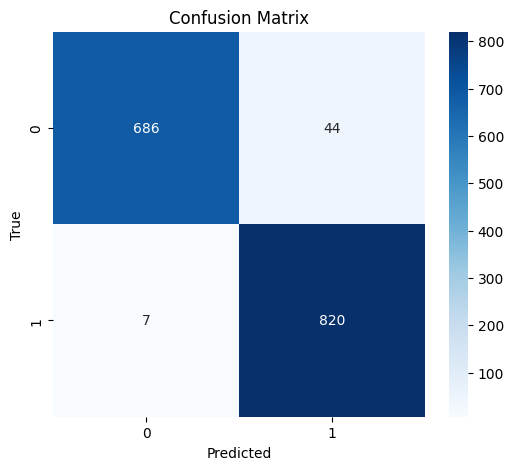

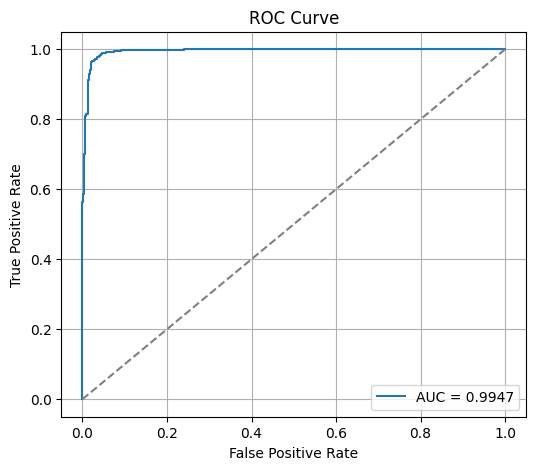

In [81]:
# Bi-LSTM
num_classes_BiLSTM = len(np.unique(y))
Bilstm_model = BiLSTMModel(
    vocab_size=10000,
    embed_dim=128,
    hidden_dim=64, 
    output_dim=num_classes_BiLSTM
).to(device)
trained_bilstm, losses, accs = train_model(Bilstm_model, train_loader, test_loader, device, model_name="BI-LSTM", epochs=5)

In [ ]:
torch.save(trained_bilstm, "bilstm_model.pkl")

TextCNN - Epoch 1/5, Loss: 0.2818, Accuracy: 0.9717
TextCNN - Epoch 2/5, Loss: 0.0491, Accuracy: 0.9782
TextCNN - Epoch 3/5, Loss: 0.0075, Accuracy: 0.9794
TextCNN - Epoch 4/5, Loss: 0.0032, Accuracy: 0.9846
TextCNN - Epoch 5/5, Loss: 0.0013, Accuracy: 0.9846

--- Model Evaluation ---
Evaluation - Accuracy:  0.9846
Evaluation - Precision: 0.9846
Evaluation - Recall:    0.9846
Evaluation - F1 Score:  0.9846
Evaluation - AUC-ROC:   0.9978


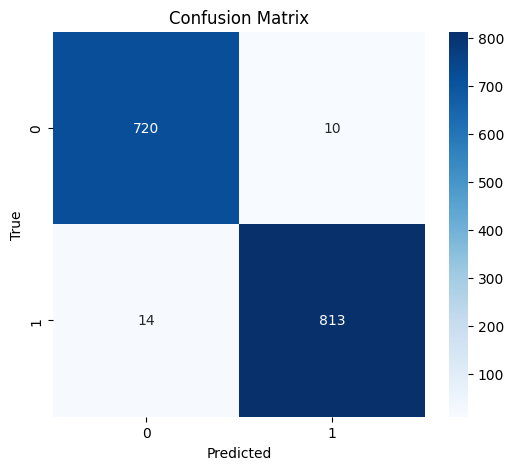

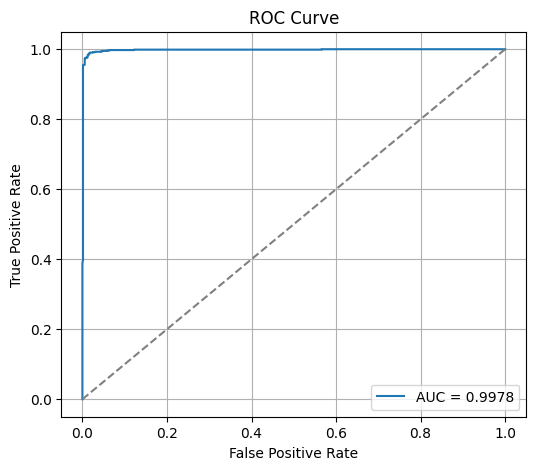

In [71]:
num_classes_CNN = len(np.unique(y))
# CNN
cnn_model = CNNModel(
    vocab_size=10000, 
    embed_dim=128,    
    num_classes=num_classes_CNN
).to(device)
trained_cnn, cnn_losses, cnn_accs = train_model(
    cnn_model,
    train_loader,
    test_loader,
    device,
    model_name="TextCNN", 
    epochs=5
)

In [ ]:
torch.save(trained_cnn, "CNN_modelARABIC.pkl")

GRU - Epoch 1/5, Loss: 0.5259, Accuracy: 0.9512
GRU - Epoch 2/5, Loss: 0.2076, Accuracy: 0.9660
GRU - Epoch 3/5, Loss: 0.1237, Accuracy: 0.9711
GRU - Epoch 4/5, Loss: 0.0754, Accuracy: 0.9756
GRU - Epoch 5/5, Loss: 0.0412, Accuracy: 0.9750

--- Model Evaluation ---
Evaluation - Accuracy:  0.9750
Evaluation - Precision: 0.9750
Evaluation - Recall:    0.9750
Evaluation - F1 Score:  0.9750
Evaluation - AUC-ROC:   0.9959


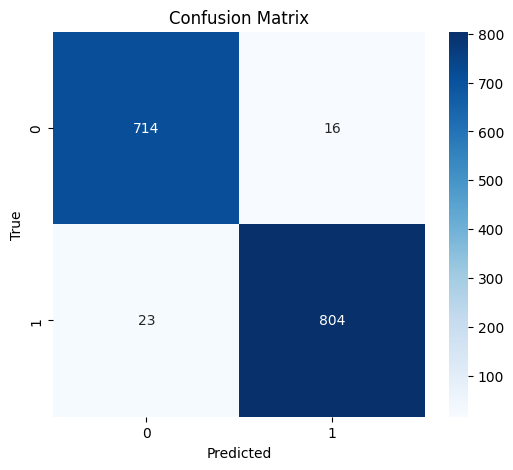

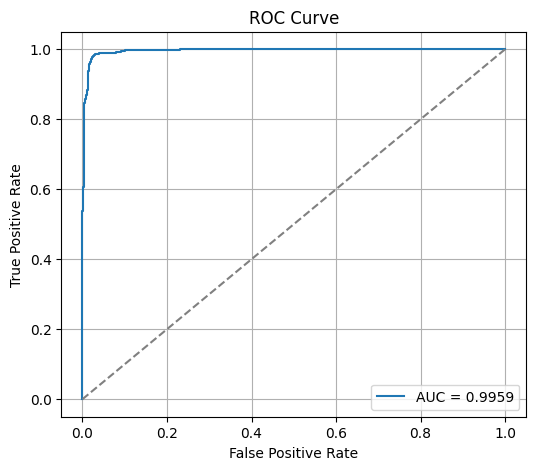

In [74]:
# GRU
num_classes_GRU = len(np.unique(y))
gru_model = GRUModel(
    vocab_size=10000, 
    embed_dim=128, 
    gru_hidden_dim=128, 
    num_classes=num_classes_GRU
).to(device)
trained_gru, losses, accs = train_model(gru_model, train_loader, test_loader, device, model_name="GRU", epochs=5)

In [ ]:
torch.save(trained_gru, "gru_modelARABIC.pkl")

DNN - Epoch 1/5, Loss: 0.3032, Accuracy: 0.9839
DNN - Epoch 2/5, Loss: 0.0625, Accuracy: 0.9846
DNN - Epoch 3/5, Loss: 0.0311, Accuracy: 0.9878
DNN - Epoch 4/5, Loss: 0.0269, Accuracy: 0.9820
DNN - Epoch 5/5, Loss: 0.0151, Accuracy: 0.9917

--- Model Evaluation ---
Evaluation - Accuracy:  0.9917
Evaluation - Precision: 0.9917
Evaluation - Recall:    0.9917
Evaluation - F1 Score:  0.9917
Evaluation - AUC-ROC:   0.9985


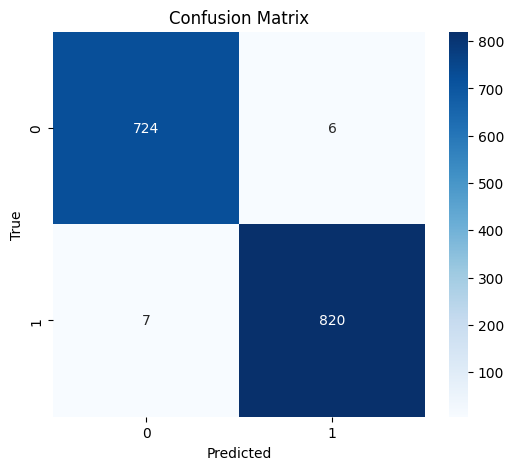

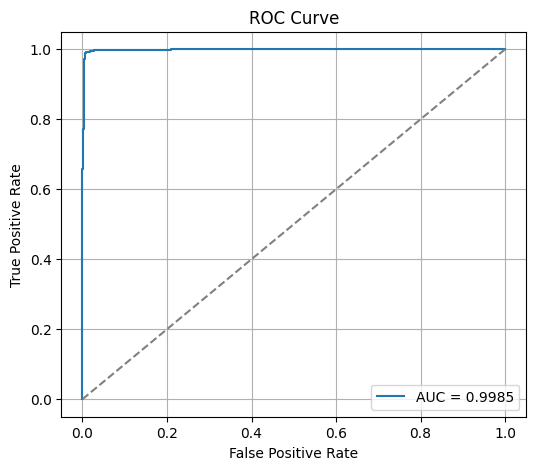

In [75]:
# DNN
num_classes_DNN = len(np.unique(y))
dnn_model = DNNModel(vocab_size=10000, 
    embed_dim=128,   
    num_classes=num_classes_DNN)
trained_dnn, losses, accs = train_model(dnn_model, train_loader, test_loader, device, model_name="DNN", epochs=5)

In [ ]:
torch.save(trained_dnn, "dnn_modelARABIC.pkl")

Transformer Models

In [1]:
import pandas as pd
df = pd.read_pickle('pickles\\arabic.pkl')
# read the preprocessed data file.

In [2]:
from TransformersTraining import  split_dataframe
train_df, val_df, test_df = split_dataframe(df)

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Free Gpu Memory

In [3]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

In [3]:
from TransformersTraining import build_arabert_classifier, train_arabert 

model, tokenizer = build_arabert_classifier()
trained_model, losses, accs = train_arabert(
    model, tokenizer,
    train_df=train_df, val_df=val_df,
    lr=2e-5, weight_decay=0.01, epochs=5,
    checkpoint_dir="arabert_checkpoints"
)



c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at aubmindlab/araelectra-base-generator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.w


Saved improved checkpoint: checkpoints_electra\best_iter100_val_0.3194.pt


Epoch 1:  59%|█████▊    | 200/341 [00:25<01:41,  1.38it/s, loss=0.174, avg_train_loss=0.266, val_loss=0.161]


Saved improved checkpoint: checkpoints_electra\best_iter200_val_0.1611.pt


Epoch 1: 100%|██████████| 341/341 [00:40<00:00,  8.38it/s, loss=0.0738]                                      


Epoch 1 validation loss: 0.0769


Epoch 2:  17%|█▋        | 59/341 [00:08<02:18,  2.04it/s, loss=0.0546]                                        


Saved improved checkpoint: checkpoints_electra\best_iter400_val_0.0464.pt


Epoch 2:  47%|████▋     | 159/341 [00:28<06:43,  2.22s/it, loss=0.0334, avg_train_loss=0.056, val_loss=0.0288]


Saved improved checkpoint: checkpoints_electra\best_iter500_val_0.0288.pt


Epoch 2: 100%|██████████| 341/341 [00:47<00:00,  7.11it/s, loss=0.456]                                        


Epoch 2 validation loss: 0.0335


Epoch 3:   5%|▌         | 18/341 [00:04<03:26,  1.57it/s, loss=0.0162]                                         


Saved improved checkpoint: checkpoints_electra\best_iter700_val_0.0146.pt


Epoch 3:  93%|█████████▎| 317/341 [00:35<00:02,  9.12it/s, loss=0.00727]                                         


Saved checkpoint at iter 1000: checkpoints_electra\ckpt_iter1000.pt


Epoch 3: 100%|██████████| 341/341 [00:49<00:00,  6.83it/s, loss=0.00785]                                         


Epoch 3 validation loss: 0.0302


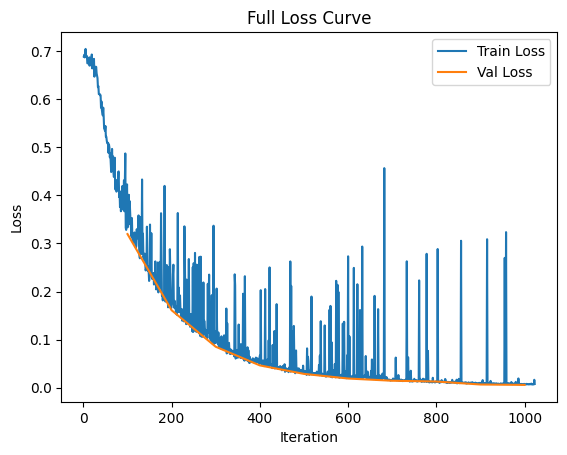

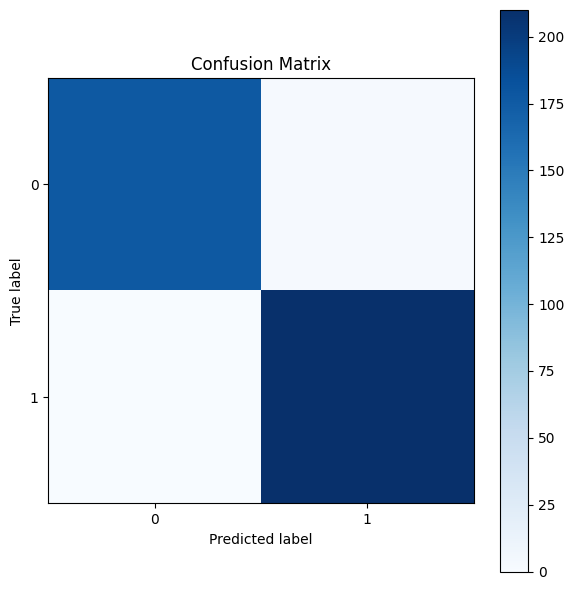

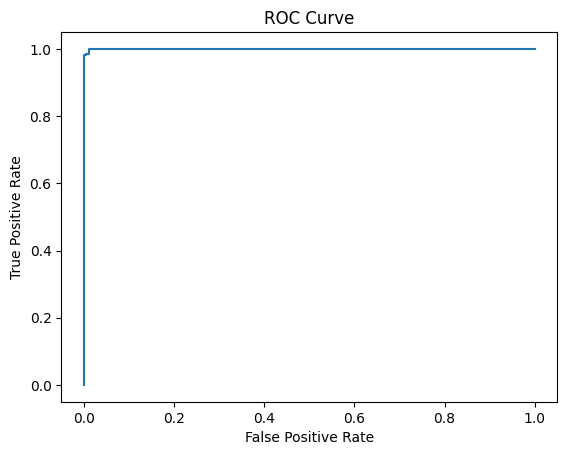

In [5]:
from TransformersTraining import build_araelectra_classifier, train_araelectra 

araelectra_model, tokenizer = build_araelectra_classifier()
train_araelectra(araelectra_model, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=100)

In [ ]:
from TransformersTraining import build_roberta, train_Transformers
from transformers import RobertaTokenizer
roberta = build_roberta()
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_Transformers(roberta, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=5)